Epoch [100/1000], Loss: 96937816.0000
Epoch [200/1000], Loss: 47247600.0000
Epoch [300/1000], Loss: 23330706.0000
Epoch [400/1000], Loss: 11819012.0000
Epoch [500/1000], Loss: 6278208.0000
Epoch [600/1000], Loss: 3611306.2500
Epoch [700/1000], Loss: 2327680.0000
Epoch [800/1000], Loss: 1709848.6250
Epoch [900/1000], Loss: 1412470.5000
Epoch [1000/1000], Loss: 1269330.8750
Predicted salaries for 7 and 8 years of experience: [[63459.016]
 [67680.94 ]]


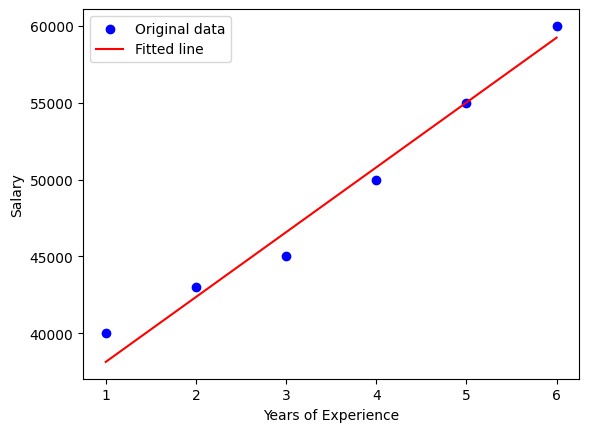

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define a simple dataset: Years of experience and corresponding salary
# Using dummy data
X_data = np.array([[1.0], [2.0], [3.0], [4.0], [5.0], [6.0]], dtype=np.float32)
y_data = np.array([[40000], [43000], [45000], [50000], [55000], [60000]], dtype=np.float32)

# Convert the numpy arrays to PyTorch tensors
X = torch.from_numpy(X_data)
y = torch.from_numpy(y_data)

# Define a simple neural network model
class SimpleRegressionModel(nn.Module):
    def __init__(self):
        super(SimpleRegressionModel, self).__init__()
        # Linear layer (input size = 1, output size = 1)
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        # Forward pass
        return self.linear(x)

# Create an instance of the model
model = SimpleRegressionModel()

# Define the loss function (Mean Squared Error) and the optimizer (Stochastic Gradient Descent)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass: Compute the model prediction
    outputs = model(X)

    # Compute the loss
    loss = criterion(outputs, y)

    # Backward pass: Zero the gradients, compute the gradients, and update weights
    optimizer.zero_grad()  # Zero the gradients
    loss.backward()        # Compute the gradients
    optimizer.step()       # Update weights

    # Print the loss at every 100th epoch
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Testing the model (predicting salaries for new values of experience)
with torch.no_grad():
    test_data = torch.tensor([[7.0], [8.0]], dtype=torch.float32)  # Example: Predict salary for 7 and 8 years of experience
    predictions = model(test_data)
    print(f"Predicted salaries for 7 and 8 years of experience: {predictions.numpy()}")

# Visualizing the result
predicted = model(X).detach().numpy()  # Get the model's predictions for the training data

# Plot the original data points and the model's predictions
plt.scatter(X_data, y_data, label='Original data', color='blue')
plt.plot(X_data, predicted, label='Fitted line', color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()
